In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3 Section a)
#### Preprocessing and data analysis
Read the data from csv file

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/adult-modified.csv", na_values=["?"])

vstable.shape

(10000, 8)

In [3]:
vstable.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

Showing the sample of first 10 rows

In [4]:
vstable.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


#### Examine missing values

The below cell shows the general info about the table. We see there are missing values for age and workclass columns.

In [5]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [6]:
vstable.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


The above cells show the following variables have missing values. age and workclass.

age: There are 198 missing values.

workclass: There are 588 missing values.

#### Instances in the data that contain a missing value

In [7]:
vstable[vstable.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...
9944,NaN,Private,12,Single,White,Female,45,<=50K
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [8]:
vstable[vstable.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K
...,...,...,...,...,...,...,...,...
9907,68.0,NaN,9,Married,White,Male,15,<=50K
9926,73.0,NaN,7,Married,White,Male,8,<=50K
9927,18.0,NaN,7,Single,White,Female,20,<=50K
9938,36.0,NaN,10,Single,White,Female,25,<=50K


The above cell shows the records with missing values. Missing records are also elaborated for each attribute "age" and "workclass".

#### Using mean value to fill the missing values for all numeric attributes 

In [9]:
age_mean = vstable.age.mean()
vstable.age.fillna(age_mean, axis=0, inplace=True)

In [10]:
vstable[vstable.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


#### Dropping all the rows with missing values for categorical attribute

In [11]:
vstable.drop(vstable[vstable.workclass.isnull()].index, axis=0, inplace=True)

In [12]:
vstable[vstable.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [13]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


The above process has filled the missing values in "Age" attribute with the mean value of individual attribute.

#### Validation to check missing values

In [14]:
vstable.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.366342,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962039,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


In [15]:
vstable[vstable.isnull().any(axis=1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


#### Characteristics of the attributes
#### Categorical variables

In [16]:
vstable.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


The above statement describes the 5 point summary of numerical attributes

In [17]:
workclass_cnt = vstable["workclass"].value_counts()
print("Frequency of value in column 'workclass' :\n")
workclass_cnt

Frequency of value in column 'workclass' :



Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [18]:
marital_status_cnt = vstable["marital-status"].value_counts()
print("Frequency of value in column 'marital-status' :\n")
marital_status_cnt

Frequency of value in column 'marital-status' :



Married    4737
Single     4675
Name: marital-status, dtype: int64

In [19]:
race_cnt = vstable["race"].value_counts()
print("Frequency of value in column 'race' :\n")
race_cnt

Frequency of value in column 'race' :



White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64

In [20]:
sex_cnt = vstable["sex"].value_counts()
print("Frequency of value in column 'sex' :\n")
sex_cnt

Frequency of value in column 'sex' :



Male      6383
Female    3029
Name: sex, dtype: int64

In [21]:
income_cnt = vstable["income"].value_counts()
print("Frequency of value in column 'income' :\n")
income_cnt

Frequency of value in column 'income' :



<=50K    7093
>50K     2319
Name: income, dtype: int64

Bar charts for Categorical variables

<AxesSubplot:title={'center':'Income Distribution'}, xlabel='Income', ylabel='Count'>

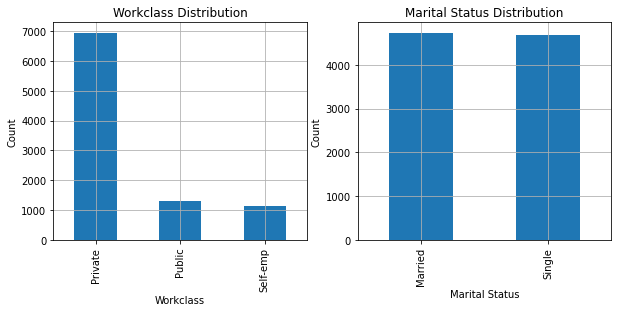

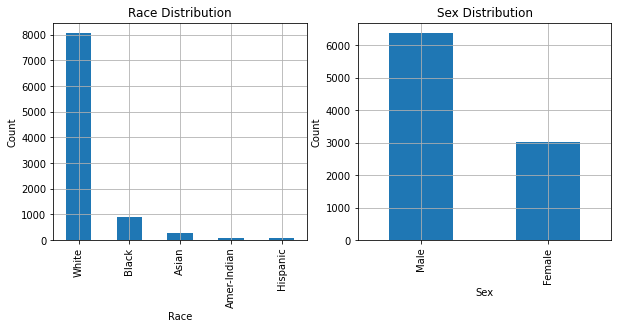

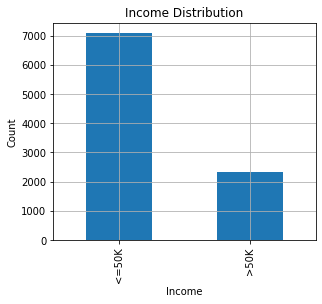

In [22]:
temp1 = vstable["workclass"].value_counts()
temp2 = vstable["marital-status"].value_counts()
temp3 = vstable["race"].value_counts()
temp4 = vstable["sex"].value_counts()
temp5 = vstable["income"].value_counts()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Count')
ax1.set_title("Workclass Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
ax1.set_title("Marital Status Distribution")
temp2.plot(kind='bar', grid = True)

fig2 = plt.figure(figsize=(10,4))
ax2 = fig2.add_subplot(121)
ax2.set_xlabel('Race')
ax2.set_ylabel('Count')
ax2.set_title("Race Distribution")
temp3.plot(kind='bar', grid = True)

ax2 = fig2.add_subplot(122)
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.set_title("Sex Distribution")
temp4.plot(kind='bar', grid = True)

fig3 = plt.figure(figsize=(4.7,4))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('Income')
ax3.set_ylabel('Count')
ax3.set_title("Income Distribution")
temp5.plot(kind='bar', grid = True)



The above bar charts shows the distirbution of records for the following variables. 

Workclass: We see the distribution of data in the following order "Private" > "Public" > "Self Emp". 

Martial Status: The distribution of Married people are higher than Unmarried. 

Gender: The distribution of Male are higher than Female. 

Race: We see the distribution of data in the following order "White" > "Black" > "Asian" > "Amer-Indian" > "Hispanic".  

Income: Majority of the people have income less than 50k. 


#### Numerical variables

Text(0.5, 0, 'Age')

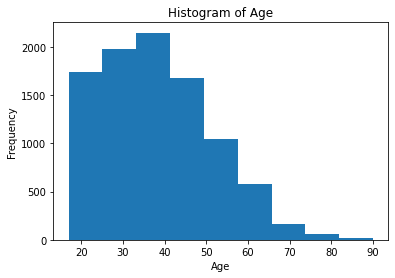

In [23]:
vstable["age"].plot(kind="hist", bins=9,title = "Histogram of Age")
plt.xlabel("Age")

The above plot shows the histogram of the age variable in 9 bins. We see the maximum number of people are below 40.

Text(0.5, 0, 'Education')

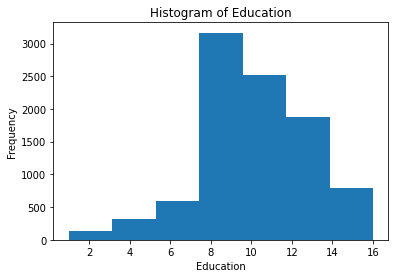

In [24]:
vstable["education"].plot(kind="hist", bins=7,title = "Histogram of Education")
plt.xlabel("Education")

The above plot shows the histogram of the education variable in 7 bins. We see the maximum number of people are between 8 and 10.

Text(0.5, 0, 'Hours per week')

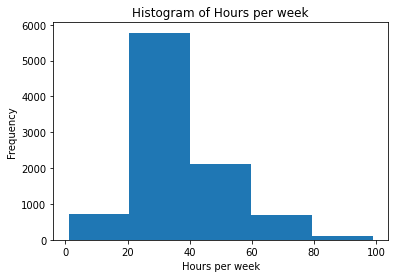

In [25]:
vstable["hours-per-week"].plot(kind="hist", bins=5,title = "Histogram of Hours per week")
plt.xlabel("Hours per week")

The above plot shows the histogram of the hours per week variable in 5 bins. We see the maximum number of people are working between 20 and 40 hours per week.

#### Cross-tabulation 
Cross-tabulations of the education attribute with the race attribute

In [26]:
ctab = pd.crosstab(vstable["education"], vstable["race"])
ctab

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


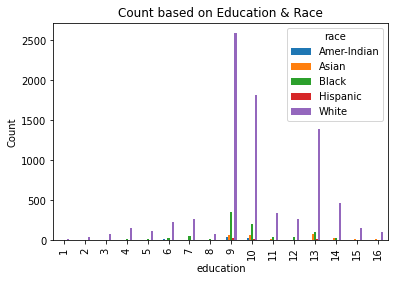

In [27]:
plt.show(ctab.plot(kind="bar",title = "Count based on Education & Race", ylabel="Count"))

The bar chart and count shows the count of records based on "Education" and "Race". 

The chart clearly shows the education is maximum in 9 and white race is the majority. 

In [28]:
ctab1 = pd.crosstab(vstable["workclass"], vstable["income"])
ctab1

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


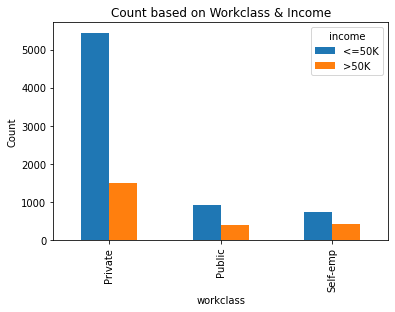

In [29]:
plt.show(ctab1.plot(kind="bar",title = "Count based on Workclass & Income", ylabel="Count"))

The bar chart and count shows the count of records based on "Workclass" and "Income". 

The chart clearly shows the majority of the people have income below 50k and belong to Private workclass. The difference in the income group within the Private workclass is large compared to Public and Sell Employed workclass.

In [30]:
ctab2 = pd.crosstab(vstable["workclass"], vstable["race"])
ctab2

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


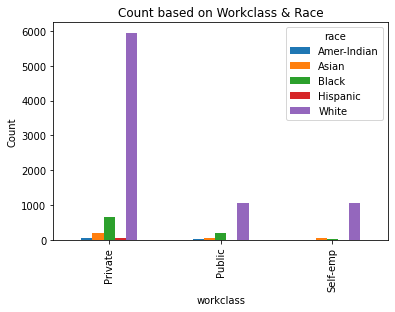

In [31]:
plt.show(ctab2.plot(kind="bar",title = "Count based on Workclass & Race", ylabel="Count"))

The bar chart and count shows the count of records based on "Workclass" and "Race". 

The chart clearly shows the majority of the people belong to White race and fall under Private workclass. 
Black and Asian are next most popular race. Asians are slightly higher in the self employed workclass than black.

In [32]:
ctab3 = pd.crosstab(vstable["race"], vstable["income"])
ctab3

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


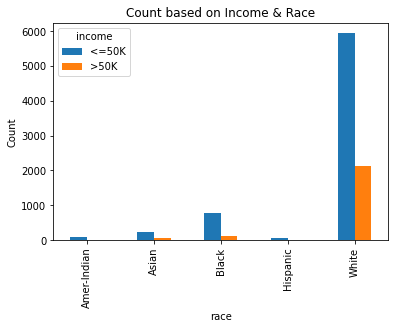

In [33]:
plt.show(ctab3.plot(kind="bar",title = "Count based on Income & Race", ylabel="Count"))

The bar chart and count shows the count of records based on "Income" and "Race". 

The chart clearly shows the majority of the people have income below 50k and belong to White race. Black and Asian are the next most popular race. There are very few Amer-Indian and Hispanic people.

In [34]:
gg_pct = pd.crosstab(vstable["race"], vstable['income'])
gg_pct

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [35]:
gg_pct["percent_low_income_race"] = (gg_pct["<=50K"]/(gg_pct["<=50K"]+gg_pct[">50K"]))*100
gg_pct = gg_pct.sort_values("percent_low_income_race", ascending=False)
gg_pct

income,<=50K,>50K,percent_low_income_race
race,,,
Hispanic,69,6,92.000000
Amer-Indian,83,9,90.217391
Black,773,119,86.659193
Asian,224,67,76.975945
White,5944,2118,73.728603


#### Compare and contrast the characteristics of the low-income and high-income categories 

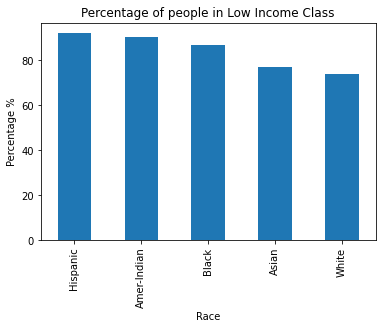

In [36]:
plt.show(gg_pct["percent_low_income_race"].plot(kind="bar",title = "Percentage of people in Low Income Class", ylabel="Percentage %", xlabel ="Race"))

The above chart shows us the income distibution for people with different races. Among White and compared to others, we see least number of people belong to low class income group. We see more than 90% of the Hispanics belong to low income group. Nearly 90% of the people and 87% of Amer Indian race and Black race respectively belong to the low income group.

In [37]:
vstable.groupby('income').describe().T

income                      <=50K         >50K
age            count  7093.000000  2319.000000
               mean     36.644604    43.632531
               std      13.340142    10.042135
               min      17.000000    19.000000
               25%      26.000000    36.000000
               50%      35.000000    43.000000
               75%      45.000000    50.000000
               max      90.000000    90.000000
education      count  7093.000000  2319.000000
               mean      9.646976    11.588185
               std       2.397358     2.410764
               min       1.000000     2.000000
               25%       9.000000     9.000000
               50%       9.000000    12.000000
               75%      10.000000    13.000000
               max      16.000000    16.000000
hours-per-week count  7093.000000  2319.000000
               mean     39.567038    45.708495
               std      11.868506    10.678794
               min       1.000000     1.000000
               25%      38.000000    40.000000
               50%      40.000000    40.000000
               75%      40.000000    50.000000
               max      99.000000    99.000000

The above chart shows us the average age among low class income group is 37 while their education is nearly 10 and people work around 39.5 hours per week.

The average age among high class income group is 44 while their education is around 12 and these group is people are hard working people compared to low income group. They work around 47 hours per week.

In [38]:
gg1 = pd.crosstab(vstable["workclass"], vstable['income'])
gg1

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


The above chart shows us the income distibution for people with different workclass. We see majority of the people belong to Private workclass. The ratio of Self Employeed people earning greater than 50K is high compared to Private and Public workclass. The ratio of people earning greater than 50K is least within Private workclass.

In [39]:
gg2 = pd.crosstab(vstable["marital-status"], vstable['income'])
gg2

income,<=50K,>50K
marital-status,,
Married,2730,2007
Single,4363,312


The above chart shows us the income distibution for people with different marital status. There are 4983 married people and 5017 singles. W see majority of the singles are earning less than 50k. Among married people, the number of people earning more than 50k is much higher.

In [40]:
gg3 = pd.crosstab(vstable["race"], vstable['income'])
gg3

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


The above chart shows us the income distibution for people with different races. We see majority of the people belong to White race. Among White, we see 1/3rd people are earning more than 50K. The ratio of people earning more than 50K is least amongst Hispanic. Nearly 1/4th of the Asian population earn greater than 50K 

In [41]:
gg4 = pd.crosstab(vstable["sex"], vstable['income'])
gg4

income,<=50K,>50K
sex,,
Female,2669,360
Male,4424,1959


The above chart shows us the income distibution for gender. The table shows us Males are a majority compared to Females.


### Problem 3 Section b)
#### Predictive Modeling and Model Evaluation:

Reading data from table

In [42]:
vs_records = vstable[['age', 'workclass', 'education', 'marital-status', 'race', 'sex','hours-per-week','income']]
vs_records.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


Converting into standardised variables

In [43]:
vs_matrix = pd.get_dummies(vs_records[['age', 'workclass', 'education', 'marital-status', 'race', 'sex','hours-per-week','income']])
vs_matrix.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37.0,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49.0,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52.0,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31.0,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42.0,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


Dropping column  income_<=50K

In [44]:
del vs_matrix['income_<=50K']

In [45]:
vs_target = vs_matrix['income_>50K']
vs_target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [46]:
vs_matrix.columns

Index(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male', 'income_>50K'],
      dtype='object')

In [47]:
vs_matrix = vs_matrix[['age', 'education', 'hours-per-week', 'workclass_Private','workclass_Public', 'workclass_Self-emp', 'marital-status_Married','marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black','race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']]

In [48]:
vs_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


Split the data into training and test sets (80%-20% split)

In [49]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8419,56.0,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2629,54.0,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2523,52.0,11,35,1,0,0,0,1,0,0,0,0,1,1,0
7143,42.0,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5902,30.0,9,50,0,0,1,1,0,0,0,0,0,1,0,1


In [50]:
print(vs_train.shape)
vs_train[0:5]

(7529, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
287,50.000000,10,45,1,0,0,0,1,0,0,0,0,1,0,1
7852,41.000000,9,40,1,0,0,0,1,0,0,0,0,1,1,0
5887,38.449806,9,50,0,1,0,0,1,0,0,0,0,1,0,1
4791,44.000000,9,40,1,0,0,0,1,0,0,0,0,1,1,0
6540,21.000000,10,45,1,0,0,0,1,0,0,0,0,1,0,1


In [51]:
vs_target_test.head()

8419    0
2629    0
2523    0
7143    1
5902    0
Name: income_>50K, dtype: uint8

#### Naive Bayes (Gaussian)

In [52]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.model_selection import cross_val_score

In [53]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)

In [54]:
nbpreds_test = nbclf.predict(vs_test)
print(nbpreds_test)

[1 1 0 ... 1 0 1]


##### Cross Validation

In [55]:
cv_scores = cross_val_score(nbclf, vs_matrix, vs_target, cv=10)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.72823779 0.70488323 0.73142251 0.70456961 0.73326249 0.70669501
 0.7120085  0.7183847  0.73113709 0.70744681]
Overall Accuracy on X-Val: 0.72 (+/- 0.02)


##### Accuracy score

In [56]:
print("Score on Training: ", nbclf.score(vs_train, vs_target_train))
print("Score on Test: ", nbclf.score(vs_test, vs_target_test))

Score on Training:  0.720547217425953
Score on Test:  0.7190653212958046


Gaussian Naive Bayes classification is performed on the dataset. The cross model selection, training model and test model have a accuracy score of 0.72. This simplifies there is no overfitting or underfitting.

#### Decision Tree

In [57]:
treeclf = tree.DecisionTreeClassifier(criterion='gini')
treeclf = treeclf.fit(vs_train, vs_target_train)

In [58]:
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

[0 1 0 ... 0 0 1]


##### Cross Validation

In [59]:
cv_scores = cross_val_score(treeclf, vs_matrix, vs_target, cv=10)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.75159236 0.77070064 0.77282378 0.77045696 0.77470776 0.77045696
 0.75132837 0.77683316 0.77258236 0.7606383 ]
Overall Accuracy on X-Val: 0.77 (+/- 0.02)


##### Accuracy score

In [60]:
print("Score on Training: ",treeclf.score(vs_train, vs_target_train))
print("Score on Test: ",treeclf.score(vs_test, vs_target_test))

Score on Training:  0.942887501660247
Score on Test:  0.7684545937334042


Decision tree classification is performed on the dataset. The accuracy score on the training set is higher than the testing set. This concludes the model is overfitting.

#### Linear discriminant analysis (LDA)

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


##### Cross Validation

In [62]:
cv_scores = cross_val_score(ldclf, vs_matrix, vs_target, cv=10)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\

[0.81210191 0.80997877 0.79193206 0.81721573 0.80977683 0.78958555
 0.79914984 0.80871413 0.82040383 0.81702128]
Overall Accuracy on X-Val: 0.81 (+/- 0.02)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


##### Accuracy score

In [63]:
print("Score on Training: ", ldclf.score(vs_train, vs_target_train))
print("Score on Test: ", ldclf.score(vs_test, vs_target_test))

Score on Training:  0.8063487846991633
Score on Test:  0.8109399893786511


Linear discriminant analysis classification is performed on the dataset. The cross model selection, training model and test model have a accuracy score of 0.81. This concludes there is no overfitting or underfitting.

This is best performing and fitting model among Decision Tree, LDA and Naive Bayes classification models